# Mumbai house price prediction model


Hum scikit-learn ke Simple Linear Regressor aur Random Forest Regressor use karenge apna model banane ke liye

In [63]:
%pip install seaborn



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: C:\Users\patha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [64]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Read the dataset

In [65]:
df = pd.read_csv("Mumbai1.csv")
df.head()

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


## Remove unnecessary columns

joh nahi chaiye woh row coloumn drop kardenge idar 

In [66]:
df_1 = df.drop(['New/Resale'], axis='columns')
df_1.head()

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,1,1,1,1,0,0,1,1,0,0,0,0


Now lets check for null values

In [67]:
df_1.isnull().sum()

Price                   0
Area                    0
Location                0
No. of Bedrooms         0
Gymnasium               0
Lift Available          0
Car Parking             0
Maintenance Staff       0
24x7 Security           0
Children's Play Area    0
Clubhouse               0
Intercom                0
Landscaped Gardens      0
Indoor Games            0
Gas Connection          0
Jogging Track           0
Swimming Pool           0
dtype: int64

No null values, which is good.

# Data Visualization and Feature Engineering

heat map correaltion ka liye

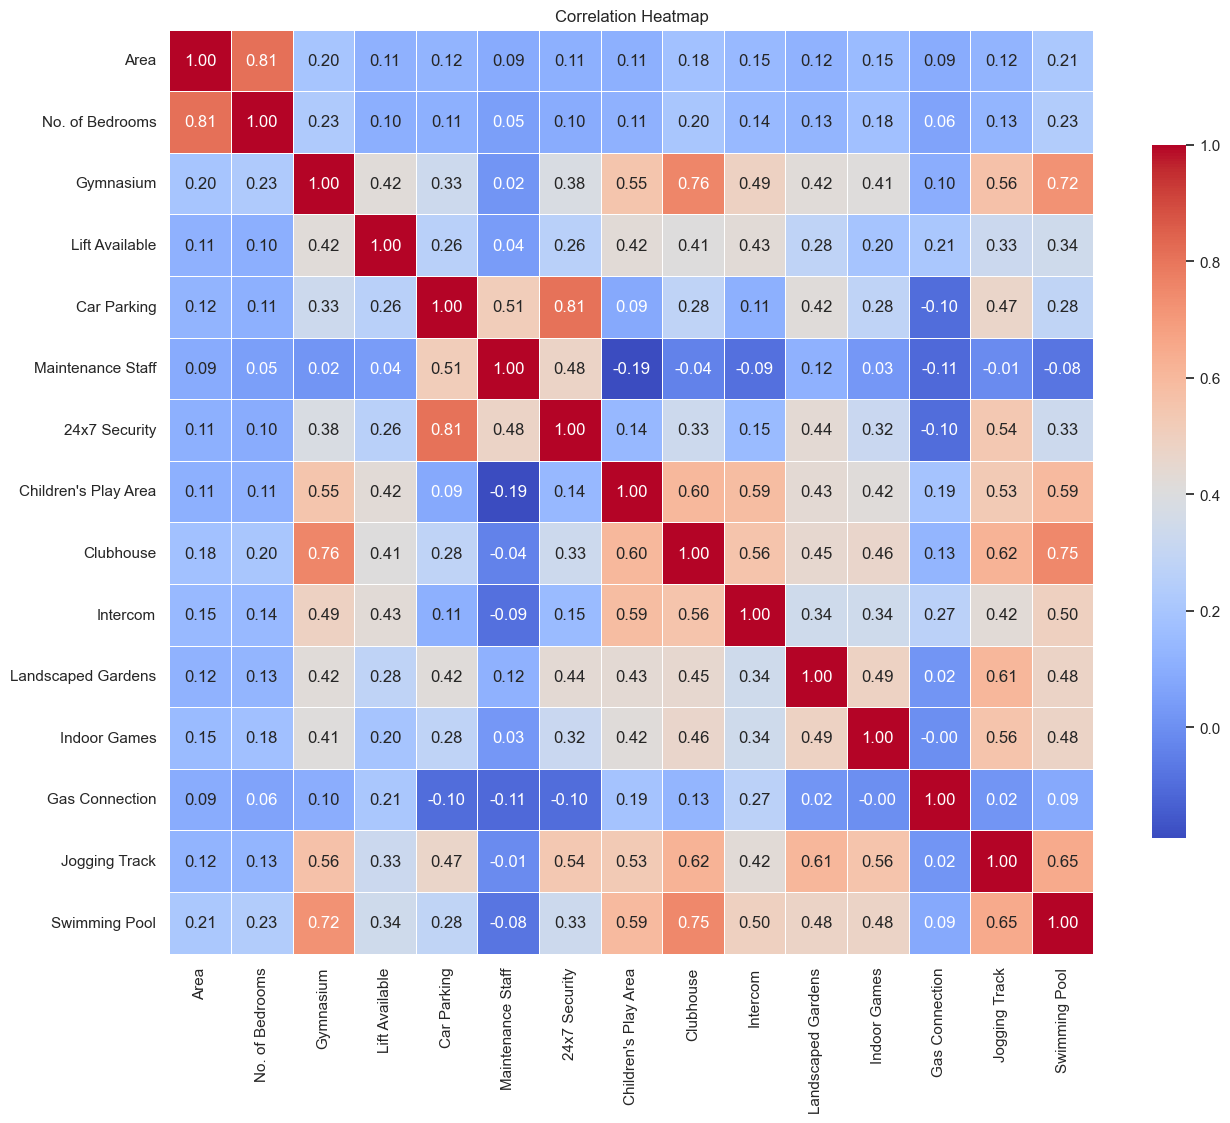

In [68]:
correlation_columns = ['Area', 'No. of Bedrooms', 'Gymnasium', 'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security', "Children's Play Area", 'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool']
correlation_matrix = df_1[correlation_columns].corr()
cool_palette = sns.color_palette("coolwarm", as_cmap=True)
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap=cool_palette, fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.75})

plt.title('Correlation Heatmap')
plt.show()

Heatmap dekh ke kuch important cheezein samajh aayi hain:

- 'Area' aur 'No. of Bedrooms' ke beech kaafi strong positive correlation hai, around **0.81**. Matlab, jaise jaise area badhta hai, bedrooms bhi generally zyada hote hain.
- 'Gymnasium' ka decent level ka positive relation hai kuch aur features ke saath – jaise 'Children's Play Area' (**0.55**), 'Clubhouse' (**0.76**), aur 'Swimming Pool' (**0.72**). Ye dikhaata hai ki kaafi societies aur apartments aise ammenities saath leke aate hain – mostly premium wale, jinki cost bhi obviously zyada hoti hai.
- Kuch aur moderate correlations bhi notice hue jaise 'Gymnasium' aur 'Lift Available' (**0.42**), 'Children's Play Area' aur 'Clubhouse' (**0.60**), aur 'Clubhouse' aur 'Swimming Pool' (**0.75**).

Toh overall yeh heatmap se yeh idea milta hai ki kaunse features ek dusre ke saath linked hote hain, especially jab baat hoti hai luxury societies ki."




Let us visualize two parameters, Number of Bedrooms and Location. 

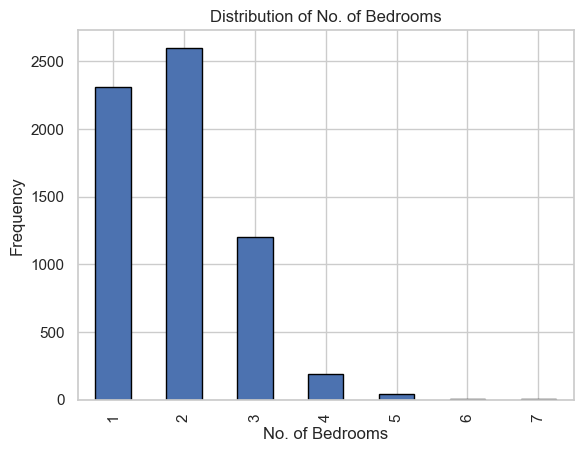

In [69]:
# No. of bedrooms Analysis

unique_bedrooms = df['No. of Bedrooms'].unique()
df_1['No. of Bedrooms'].value_counts().loc[unique_bedrooms].sort_index().plot(kind='bar', edgecolor='black')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of No. of Bedrooms')
plt.show()

In [70]:
df_1['No. of Bedrooms'].value_counts()

No. of Bedrooms
2    2601
1    2307
3    1201
4     190
5      39
6       7
7       2
Name: count, dtype: int64

There are a lot of 1, 2 and 3 Bedroom apartments while 4 Bedrooms and above are very few. Let us group 4 and above together.

In [71]:
df_1['No. of Bedrooms'] = df_1['No. of Bedrooms'].replace({4: '4-7', 5: '4-7', 6: '4-7', 7: '4-7'})
df_1['No. of Bedrooms'].value_counts()

No. of Bedrooms
2      2601
1      2307
3      1201
4-7     238
Name: count, dtype: int64

Now, let us visulize the location column.

In [72]:
location_counts = df_1.Location.value_counts() # The number of entries in our dataset for a particular location (Out of 413 locations)
location_counts.describe()

count    413.000000
mean      15.368039
std       48.351616
min        1.000000
25%        1.000000
50%        2.000000
75%        8.000000
max      533.000000
Name: count, dtype: float64

We can see a lot of locations which have 15 houses or less. Let us group all such locations together and implement Dimensionality reduction (Inspired by Owais Bin Mushtaq https://www.kaggle.com/code/owaisbinmushtaq/housing-price-in-mumbai ).
We can choose either <=15 or <=10 and see which gives a better result.

In [73]:
location_counts = df_1.Location.value_counts()
locations_to_group = location_counts[location_counts <= 10].index
df_1['Location'] = df_1['Location'].replace(locations_to_group, 'Others')
updated_location_counts = df_1['Location'].value_counts()
updated_location_counts

Location
Others            808
Kharghar          533
Thane West        418
Mira Road East    390
Ulwe              319
                 ... 
Ghatkopar          12
Vashi              12
Kalyan East        11
Palghar            11
Kurla West         11
Name: count, Length: 90, dtype: int64

Before visualizing each location, let us create a new column which would contain Price per square feet of the apartment.

In [74]:
df_1['Price_per_sqft'] = df_1['Price'] / df_1['Area']
df_1.head()

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_per_sqft
0,4850000,720,Kharghar,1,0,1,1,1,1,0,0,0,0,0,0,0,0,6736.111111
1,4500000,600,Kharghar,1,1,1,1,1,1,0,1,0,0,0,0,1,1,7500.000000
2,6700000,650,Kharghar,1,1,1,1,1,1,1,1,1,0,0,0,1,1,10307.692308
3,4500000,650,Kharghar,1,0,1,1,1,1,0,0,1,1,0,0,0,0,6923.076923
4,5000000,665,Kharghar,1,0,1,1,1,1,0,0,1,1,0,0,0,0,7518.796992


ab jab 'Price_per_sqft' column dataset mein add ho gaya hai toh abb har ek location ko visualize karte hain – especially 'others' waale column ko – aur dekhte hain kahin koi outliers toh nahi hain Price per square feet ke terms mein.

In [75]:
# Filter the data for 'Price_per_sqft' and 'Location'
data_for_boxplot = df_1[['Price_per_sqft', 'Location']]

# Get unique locations
unique_locations = df_1['Location'].unique()

# Create subplots for each location
fig, axes = plt.subplots(nrows=len(unique_locations), figsize=(16, 5 * len(unique_locations)))

# Iterate through unique locations and create box plots
for i, location in enumerate(unique_locations):
    sns.boxplot(x='Price_per_sqft', data=data_for_boxplot[data_for_boxplot['Location'] == location], ax=axes[i])
    axes[i].set_title(f'Box Plot for {location}')
    axes[i].set_xlabel('Price_per_sqft')

plt.tight_layout()
plt.show()

Let us drop some of the extreme outliers

In [76]:
grouped_data = df_1.groupby('Location')

def remove_outliers(group):
    Q1 = group['Price_per_sqft'].quantile(0.25)
    Q3 = group['Price_per_sqft'].quantile(0.75)
    IQR = Q3 - Q1

    # Define a threshold for identifying outliers
    outlier_threshold = 1.5

    # Identify potential outliers
    outliers_mask = (group['Price_per_sqft'] < (Q1 - outlier_threshold * IQR)) | (group['Price_per_sqft'] > (Q3 + outlier_threshold * IQR))

    # Remove outliers
    return group[~outliers_mask]

# Apply the function to each group
df_2 = grouped_data.apply(remove_outliers)

# Reset index after removing outliers
df_2.reset_index(drop=True, inplace=True)
df_2.shape

C:\Users\patha\AppData\Local\Temp\ipykernel_9112\2743509673.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_2 = grouped_data.apply(remove_outliers)


(5983, 18)

In [77]:
df_2.head()

,Price,Area,Location,No. of Bedrooms,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool,Price_per_sqft
0,9500000,1000,Airoli,2,0,1,1,1,1,0,1,0,0,0,0,0,1,9500.000000
1,14900000,1245,Airoli,2,0,1,1,0,0,0,0,0,0,0,1,0,0,11967.871486
2,14000000,1183,Airoli,2,1,1,1,0,1,1,1,1,1,1,0,1,1,11834.319527
3,14800000,1245,Airoli,2,0,1,1,1,1,0,0,0,0,0,0,0,0,11887.550201
4,6400000,495,Airoli,1,0,0,0,0,0,0,0,0,0,0,0,0,0,12929.292929


After removing the extreme outliers, we are left with 5983 rows of data.

# Encoding
After Feature engineering, we can use One Hort Encoding on 'Location' and 'No. of Bedrooms'.

In [78]:
df_2.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Gymnasium',
       'Lift Available', 'Car Parking', 'Maintenance Staff', '24x7 Security',
       'Children's Play Area', 'Clubhouse', 'Intercom', 'Landscaped Gardens',
       'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool',
       'Price_per_sqft'],
      dtype='object')

In [79]:
df_2 = pd.get_dummies(df_1, columns=['No. of Bedrooms', 'Location'], prefix=['Bedrooms', 'Location'])
df_2.head()

,Price,Area,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,...,Location_Vashi,Location_Ville Parle East,Location_Virar,Location_Virar East,Location_Virar West,Location_Wadala,Location_Wadala East Wadala,Location_Worli,Location_matunga east,Location_mumbai
0,4850000,720,0,1,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,4500000,600,1,1,1,1,1,0,1,0,...,False,False,False,False,False,False,False,False,False,False
2,6700000,650,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
3,4500000,650,0,1,1,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,5000000,665,0,1,1,1,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False


# Split dependent and independent variables.

In [80]:
X = df_2.drop(['Price'],axis = 'columns')
y = df_2.Price

# Create Training, Testing and Validation sets.


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [82]:
X_train.shape

(3808, 109)

In [83]:
X_test.shape

(1270, 109)

In [84]:
X_val.shape

(1269, 109)

# Simple Linear Regression.
Let us first apply the SLR model

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Let us perform cross-validation using K-fold

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Define the model
lr_model = LinearRegression()

# 2. Fit the model on training data
lr_model.fit(X_train, y_train)

# 3. Predict on validation data
y_pred_lin_val = lr_model.predict(X_val)

# 4. Evaluate using R^2
r2_lin_val = r2_score(y_val, y_pred_lin_val)

# 5. Print results
print('\nSimple Linear Regression Metrics on Validation Set:')
print(f'R-squared (R2): {r2_lin_val}')



Simple Linear Regression Metrics on Validation Set:
R-squared (R2): 0.8497217558887744


Let us check for overfitting by calculating R2 score for the Validation set.

In [87]:
from sklearn.metrics import r2_score
y_pred_lin_val = lr_model.predict(X_val)
r2_lin_val = r2_score(y_val, y_pred_lin_val)
print('\nSimple Linear Regression Metrics on Validation Set:')
print(f'R-squared (R2): {r2_lin_val}')


Simple Linear Regression Metrics on Validation Set:
R-squared (R2): 0.8497217558887744


Lower R2 score for the validation set than the Cross validation score indicates slight over-fitting. Let us calculate Metrics of the Simple Linear Regression model.

In [88]:
y_pred_lin = lr_model.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f'Linear Regression Mean Squared Error (MSE): {mse_lin}')
print(f'Linear Regression Mean Absolute Error: {mae_lin}')
print(f'Linear Regression R-squared (R2): {r2_lin}')

Linear Regression Mean Squared Error (MSE): 36511348558057.25
Linear Regression Mean Absolute Error: 3609234.5436191875
Linear Regression R-squared (R2): 0.87149218956978


Actual Price vs Predicted Price (validation set) scatter plot

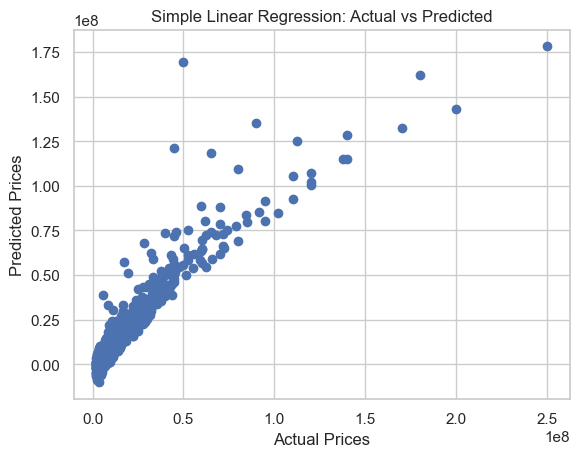

In [89]:
plt.scatter(y_val, y_pred_lin_val)
plt.title('Simple Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

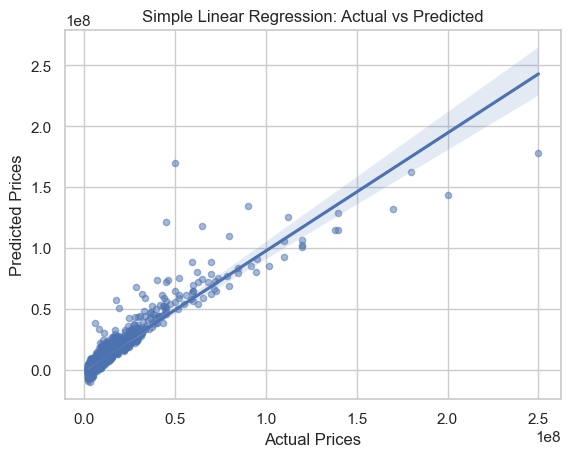

In [90]:
sns.regplot(x=y_val, y=y_pred_lin_val, scatter_kws={'s': 20, 'alpha': 0.5})
plt.title('Simple Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

Actual Price vs Predicted Price (test set) scatter plot

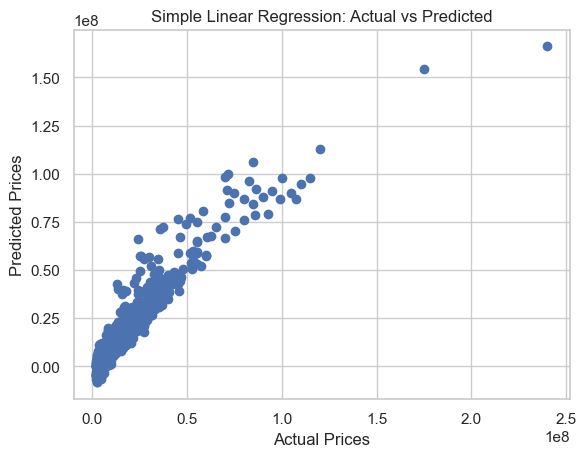

In [91]:
plt.scatter(y_test, y_pred_lin)
plt.title('Simple Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

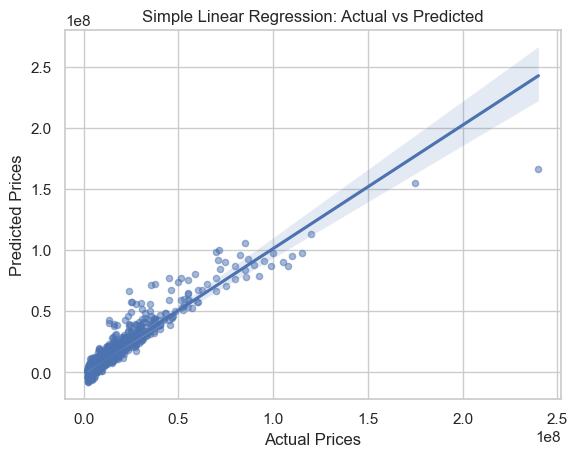

In [92]:
sns.regplot(x=y_test, y=y_pred_lin, scatter_kws={'s': 20, 'alpha': 0.5})
plt.title('Simple Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Random Forest Regression

The Simple Linear Regression model gives us a R2 score of 87%. Let's try building a model using the Random Forest Regressor Algorithm.

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rf_model = RandomForestRegressor(random_state=10)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

Let's now perform cross-validation and checke the R2 score.

In [94]:
rf_cross_val_scores = cross_val_score(rf_model, X, y, scoring='r2', cv=kf)
print(f'Random Forest Cross-Validation R2 Scores: {rf_cross_val_scores}')
print(f'Mean R2 Score: {np.mean(rf_cross_val_scores)}')

Random Forest Cross-Validation R2 Scores: [0.98307684 0.98372275 0.90418589 0.97365565 0.93294265]
Mean R2 Score: 0.9555167546878437


Now lets calculate the Validation set's R2 score so as to check for over-fitting

In [95]:
y_pred_rf_val = rf_model.predict(X_val)
r2_rf_val = r2_score(y_val, y_pred_rf_val)
print('\nRandom Forest Metrics on Validation Set:')
print(f'R-squared (R2): {r2_rf_val}')


Random Forest Metrics on Validation Set:
R-squared (R2): 0.9833887264159374


Agar training aur validation dono sets pe R² score high aa raha hai, toh iska matlab hai ki Random Forest model data ke patterns ko achhe se samajh raha hai, aur abhi tak overfitting ka koi bada issue nahi lag raha.

Lekin sirf R² score dekh ke confirm nahi kar sakte. Thoda aur deep jaake humein training aur validation sets ka MSE (Mean Squared Error) aur MAE (Mean Absolute Error) compare karna chahiye. Agar dono mein zyada farak aata hai, tab ho sakta hai model overfit kar raha ho. Otherwise sab sahi hain

Let's check metrics of our Random Forest Regression model.

In [96]:
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 6557697203873.586
Mean Absolute Error: 359370.1392047244
R-squared (R2): 0.9769190856428062


Random Forest model scatter plots for Actual vs Predicted (validation set)

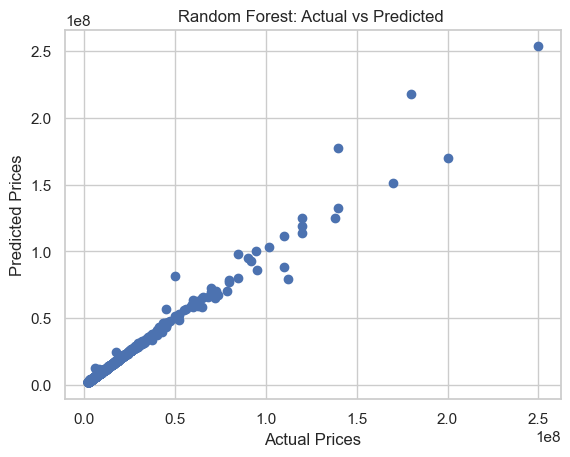

In [97]:
plt.scatter(y_val, y_pred_rf_val)
plt.title('Random Forest: Actual vs Predicted ')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

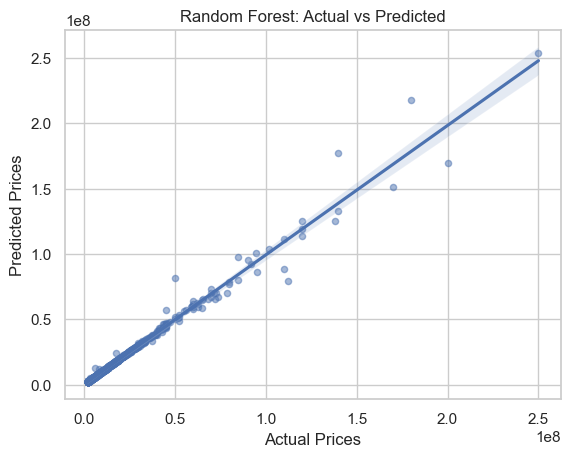

In [98]:
sns.regplot(x=y_val, y=y_pred_rf_val, scatter_kws={'s': 20, 'alpha': 0.5})
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

Random Forestplots for Actual vs Predicted (test set)

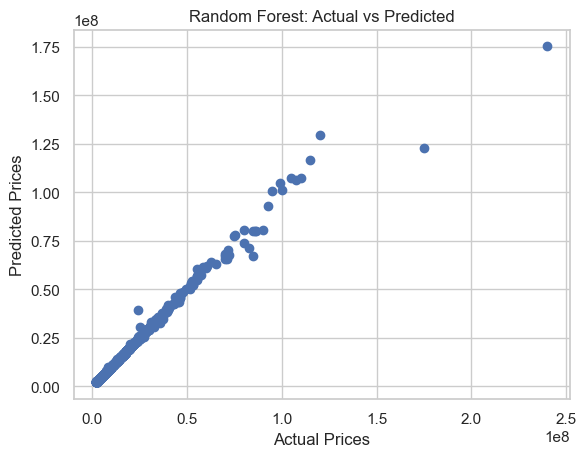

In [99]:
plt.scatter(y_test, y_pred)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

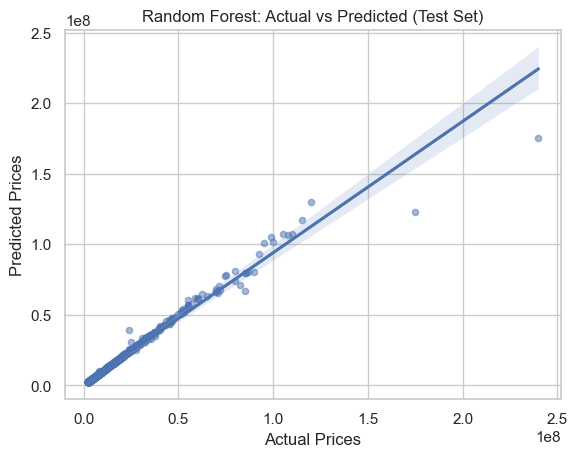

In [100]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20, 'alpha': 0.5})
plt.title('Random Forest: Actual vs Predicted (Test Set)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [101]:
import joblib
joblib.dump(lr_model, "mumbai_model.pkl")


['mumbai_model.pkl']